<a href="https://colab.research.google.com/github/Anik-Adnan/Natural-Language-Processing/blob/main/Advanced_Lexical_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📖 Session Introduction

### Introduction
In the previous session, you learnt all the **basic lexical processing techniques** such as:
- Removing stop words  
- Tokenization  
- Stemming and lemmatization  
- Creating Bag-of-Words and TF-IDF models  
- Building a spam detector  

These preprocessing steps are applicable in **almost every text analytics application**.

Even after applying these preprocessing steps, **a lot of noise is still present** in the data. Examples include:
- Spelling mistakes (by accident or intentionally, e.g., 'lol', 'awsum')  
- Spelling variations due to pronunciation differences (e.g., Bangalore vs Bengaluru)  

In this session, you’ll learn how to:
- **Identify and process incorrectly spelt words**  
- **Handle spelling variations**  
- Tokenize text **efficiently**, especially for multi-word terms like:
  - ‘Hong Kong’  
  - ‘Calvin Klein’  
  - ‘International Institute of Information Technology’  

Simple tokenization splits these into separate words, but such terms should be preserved as **single tokens**. This session will cover techniques to build **intelligent tokenizers**.

---

### 🔹 What you’ll learn in this session
1. **Phonetic hashing and the Soundex algorithm** to handle different pronunciations of a word.  
2. **Minimum-edit-distance algorithm** and building a spell corrector.  
3. **Pointwise Mutual Information (PMI)** score to preserve multi-word terms as single tokens.  

---

### 📌 Prerequisites
- Knowledge of the **previous session** and the **previous module**.  
- No additional prerequisites are required for this session.  


## 🛠️ Canonicalisation

### Introduction
In the last session, you learnt techniques to **reduce a word to its base form**, specifically:  
- **Stemming**  
- **Lemmatization**  

These techniques are part of a broader concept called **canonicalisation**.  

**Canonicalisation**: The process of reducing a word to its base form.  
- **Stemming:** Reduces a word to its root form.  
- **Lemmatization:** Reduces a word to its lemma.  
- Both root and lemma are **base forms of inflected words**.

---

### 🔹 Limitations of Stemming and Lemmatization
Some cases cannot be handled effectively by stemming or lemmatization alone. For example, **misspelled words**:

Corpus contains two misspelt versions of *disappearing*:  


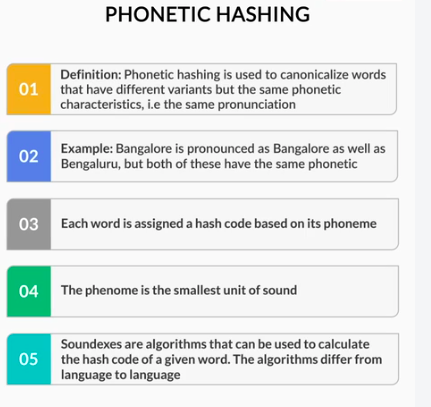

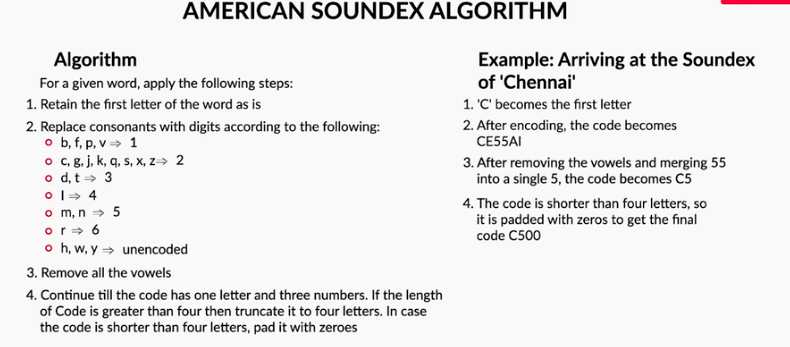

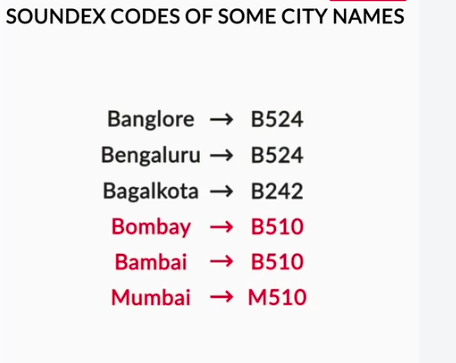

## 🔊 Phonetic Hashing

### Introduction
Certain words have **different pronunciations** in different languages, which often leads to **different spellings** in a text corpus. Examples include:  
- City names: `Delhi` vs `Dilli`  
- Personal names: `Agrawal` with multiple spellings  
- Dish names and other proper nouns  

Applying **stemming or lemmatization** alone does not solve the problem of **redundant tokens**, because multiple variants of the same word still exist. To address this, we use **phonetic hashing**.

---

### 🔹 What is Phonetic Hashing?
Phonetic hashing groups **words with similar sounds (phonemes)** into a single bucket and assigns them a **common hash code**.  

Example:  
- `Dilli` and `Delhi` → same hash code  

This ensures that all variations of a word **map to the same canonical form**, reducing redundancy.

---

### 🔹 Soundex Algorithm
The most popular phonetic hashing method is the **American Soundex algorithm**.  
- Maps words that sound similar to a **common code**  
- Works across dialects and languages  
- Handles **British vs American spellings**  

---

### 🔹 Example: Soundex of "Mississippi"

1. **First letter retained:**  
   - Input: `Mississippi`  
   - Code starts with: `M`  

2. **Map consonants (except first letter):**  
   - Vowels remain as is (`A, E, I, O, U`)  
   - Letters `H, W, Y` are **ignored/unencoded**  
   - Consonants mapped to numbers → `MI22I22I11I`  

3. **Remove vowels:**  
   - Remove all `I`s → `M222211`  

4. **Merge consecutive duplicates:**  
   - `222` → `2`  
   - `11` → `1`  
   - Code becomes → `M21`  

5. **Force four-character code:**  
   - If less than four characters, **pad with zeros**  
   - If more than four characters, **truncate from the right**  
   - `M21` → pad → `M210`  

**Final Soundex code:**  


### ❓ True/False Question

**Statement:**  
The first letter of the Soundex of **Mumbai** and **Bombay** is the same.  

**Answer:**  
**False**  

**Explanation:**  
- Soundex retains the **first letter of the word** as the first character of the code.  
- `Mumbai` → Soundex starts with **M**  
- `Bombay` → Soundex starts with **B**  
- Since **M ≠ B**, the first letters are **not the same**.


### ❓ Question: Phonetic Hashing

**The reason behind not mapping the vowels and ‘H’, ‘Y’, and ‘W’ to integer numbers is:**  

**Answer:**  
**The vowels and the letters ‘H’, ‘Y’ and ‘W’ are the letters whose sounds change in a word in different accents and pronunciations.**  

**Explanation:**  
- Soundex aims to group words by **similar pronunciation**, not exact spelling.  
- Vowels and letters like `H, Y, W` often **do not affect the phonetic identity** significantly.  
- Ignoring them reduces **redundant variations** while preserving the main consonant sounds.


### ❓ True/False Question

**Statement:**  
The Soundex of **Bengaluru** and **Mysuru** is the same.  

**Answer:**  
**False**  

**Explanation:**  
- Soundex retains the **first letter of the word** and encodes the remaining consonants.  
- `Bengaluru` → starts with **B**  
- `Mysuru` → starts with **M**  
- Since the first letters differ, the **Soundex codes are different**.
